In [4]:
import sys
import os

# 1. Get the path to the directory above the current one (i.e., the project root)
# os.getcwd() gives '.../project_root/notebook'
# '..' steps up to '.../project_root'
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# 2. Add the project root to the list of places Python looks for modules
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [13]:
import sys

from omegaconf import OmegaConf
from src.data.datasets.mm_base import build_mm_datasets
from src.utils.plot_utils import visualize_multichannel_image
import pandas as pd
import numpy as np

In [17]:
base_cfg = OmegaConf.load("../src/data/configs/base_config.yaml")
base_cfg.marker_embedding_dir = "../src/data/esm2_t30_150M_UR50D"
wang_cfg = OmegaConf.load("configs/wang23.yaml")
ds_cfg = OmegaConf.merge(base_cfg, wang_cfg)
print("")

FileNotFoundError: [Errno 2] No such file or directory: '/data/code/jon/project-2-gradient_tri_scent/notebooks/configs/wang23.yaml'

In [9]:
ds = build_mm_datasets(ds_cfg)

2025-07-28 15:43:28.301 | DEBUG    | datasets.mm_base:__init__:119 - Loading dataset wang23 from /mnt/aimm/scratch/datasets/wang23
2025-07-28 15:43:28.331 | INFO     | datasets.multiplex_base:__init__:30 - Multiplex Normalization metadata: QuantileMultiplexNormalizeMetadata(normalizer_name='tm_local_q_global_std', rnd_crop_folder_name='random_crops_256_no_log', channel_file_name='channels', mean_name='quantiles/tm_clip99/global_level_means.csv', std_name='quantiles/tm_clip99/global_level_stds.csv', quantile_path='quantiles/tm_clip99/image_level_quantiles.csv')
2025-07-28 15:43:28.416 | INFO     | datasets.multiplex_base:__init__:40 - Crop folder /mnt/aimm/scratch/datasets/wang23/imc/random_crops_256_no_log exists
/mnt/aimm/scratch/querfurth/temp/datasets_loading/datasets/multiplex_base.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future 

In [18]:
clinical = pd.read_csv("/mnt/aimm/scratch/datasets/wang23/clinical.csv")

In [19]:
clinical

,ImageID,ImageNumber,BiopsyPhase,tissue_id,dataset,patient_id,specimen_id,imc,alignment,original_patient_identifier,imc_mpp,height,width,original_file_name,isPerProtocol,pCR,Arm,PatientID
0,NTImg0001,1,On-treatment,wang23_dxjcccxu_0,wang23,dxjcccxu,0,1,NaN,NT008,1,500,500,NTImg0001FullStack,False,RD,C,NT008
1,NTImg0002,2,On-treatment,wang23_dxjcccxu_1,wang23,dxjcccxu,1,1,NaN,NT008,1,500,500,NTImg0002FullStack,False,RD,C,NT008
2,NTImg0003,3,On-treatment,wang23_dxjcccxu_2,wang23,dxjcccxu,2,1,NaN,NT008,1,500,500,NTImg0003FullStack,False,RD,C,NT008
3,NTImg0004,4,On-treatment,wang23_dxjcccxu_3,wang23,dxjcccxu,3,1,NaN,NT008,1,500,500,NTImg0004FullStack,False,RD,C,NT008
4,NTImg0005,5,On-treatment,wang23_dxjcccxu_4,wang23,dxjcccxu,4,1,NaN,NT008,1,500,500,NTImg0005FullStack,False,RD,C,NT008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,NTImg1885,1885,Baseline,wang23_rlbvqtmf_1,wang23,rlbvqtmf,1,1,NaN,NT039,1,500,500,NTImg1885FullStack,True,RD,C,NT039
1851,NTImg1886,1886,Baseline,wang23_rlbvqtmf_2,wang23,rlbvqtmf,2,1,NaN,NT039,1,500,500,NTImg1886FullStack,True,RD,C,NT039
1852,NTImg1887,1887,On-treatment,wang23_zphcwiob_3,wang23,zphcwiob,3,1,NaN,NT091,1,500,500,NTImg1887FullStack,True,RD,C&I,NT091
1853,NTImg1888,1888,On-treatment,wang23_zphcwiob_4,wang23,zphcwiob,4,1,NaN,NT091,1,500,500,NTImg1888FullStack,True,RD,C&I,NT091


In [28]:
uniprot_to_name = ds[0].unimodal_datasets["imc"].get_marker_embedding_index_to_name_dict()

In [29]:
ds[0].unimodal_datasets["imc"]

In [32]:
uniprot_to_name

{np.int64(39): 'MPO',
 np.int64(160): 'Histone3',
 np.int64(158): 'SMA',
 np.int64(21): 'Cytokeratin 5/14',
 np.int64(40): 'Keratin 8/18',
 np.int64(17): 'HLA-DR',
 np.int64(131): 'CD68',
 np.int64(93): 'H2AX pS139',
 np.int64(55): 'CD45',
 np.int64(180): 'CA9',
 np.int64(187): 'CD163',
 np.int64(76): 'CD20',
 np.int64(16): 'Rabbit IgG (H+L)',
 np.int64(81): 'CD56',
 np.int64(205): 'Helios',
 np.int64(15): 'CD8',
 np.int64(141): 'CD134',
 np.int64(107): 'CD11c',
 np.int64(47): 'CD3',
 np.int64(115): 'GATA-3',
 np.int64(196): 'TOX/TOX2',
 np.int64(206): 'T-bet',
 np.int64(176): 'CD279',
 np.int64(89): 'IDO',
 np.int64(68): 'AR',
 np.int64(200): 'FoxP3',
 np.int64(203): 'CD274',
 np.int64(212): 'CD278',
 np.int64(142): 'Ki-67',
 np.int64(14): 'CD4',
 np.int64(134): 'TCF1/TCF7',
 np.int64(62): 'PDGFRbeta',
 np.int64(94): 'CD31',
 np.int64(66): 'GranzymeB',
 np.int64(188): 'Podoplanin',
 np.int64(32): 'HLA-ABC',
 np.int64(63): 'cleaved PARP',
 np.int64(41): 'panKeratin_AE3',
 np.int64(77):

wang23_dxjcccxu_0
['MPO', 'Histone3', 'SMA', 'Cytokeratin 5/14', 'Keratin 8/18', 'HLA-DR', 'CD68', 'H2AX pS139', 'CD45', 'CA9', 'CD163', 'CD20', 'Rabbit IgG (H+L)', 'CD56', 'Helios', 'CD8', 'CD134', 'CD11c', 'CD3', 'GATA-3', 'TOX/TOX2', 'T-bet', 'CD279', 'IDO', 'AR', 'FoxP3', 'CD274', 'CD278', 'Ki-67', 'CD4', 'TCF1/TCF7', 'PDGFRbeta', 'CD31', 'GranzymeB', 'Podoplanin', 'HLA-ABC', 'cleaved PARP', 'panKeratin_AE3', 'CD79a', 'Vimentin', 'Calponin 1', 'Caveolin-1', 'CD15']


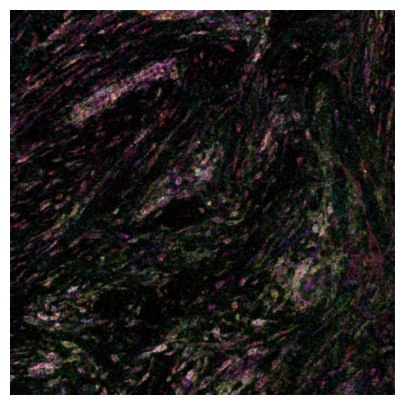

In [ ]:
tids = ds[0].unimodal_datasets["imc"].get_tissue_ids()

for tid in tids:
    print(tid)
    # This function returns you a tensor which is normalized already according to the normalization selected in the base_config under image_info
    tissue = ds[0].unimodal_datasets["imc"].get_tissue(tid)
    tissue = np.array(tissue)
    visualize_multichannel_image(tissue)
    channels = np.array(ds[0].unimodal_datasets["imc"].get_marker_embedding_indices(tid))
    print(list(map(lambda x: uniprot_to_name[x], channels)))
    break